In [12]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
#loading dataset
df = pd.read_csv('data/Bengaluru_House_Data.csv')

In [14]:
df.sample(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
1891,Super built-up Area,19-Dec,Old Madras Road,3 BHK,SheldGr,1350,3.0,1.0,58.99
76,Super built-up Area,Ready To Move,Kalena Agrahara,2 BHK,NaN,1150,2.0,3.0,40.00
12724,Plot Area,Ready To Move,HAL 2nd Stage,8 Bedroom,NaN,1000,7.0,3.0,260.00
403,Super built-up Area,Ready To Move,Gokula Extension,4 BHK,NaN,1200,4.0,1.0,175.00
7578,Super built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1250,2.0,1.0,50.00


In [15]:
df.shape

(13320, 9)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [17]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [18]:
#percentage missing in cols
(df.isnull().sum() / df.shape[0]) * 100

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

In [19]:
#since society have 41% missing value so this feature will get droped
df.drop(columns=['society'],inplace=True)

In [20]:
#checking unique values in all columns
df.nunique()

area_type          4
availability      81
location        1305
size              31
total_sqft      2117
bath              19
balcony            4
price           1994
dtype: int64

In [21]:
for cols in df.columns:
    print((df[cols].value_counts()/df.shape[0])*100)

area_type
Super built-up  Area    65.990991
Built-up  Area          18.153153
Plot  Area              15.202703
Carpet  Area             0.653153
Name: count, dtype: float64
availability
Ready To Move    79.436937
18-Dec            2.304805
18-May            2.214715
18-Apr            2.034535
18-Aug            1.501502
                   ...    
15-Aug            0.007508
17-Jan            0.007508
16-Nov            0.007508
16-Jan            0.007508
14-Jul            0.007508
Name: count, Length: 81, dtype: float64
location
Whitefield                        4.054054
Sarjapur  Road                    2.995495
Electronic City                   2.267267
Kanakpura Road                    2.049550
Thanisandra                       1.756757
                                    ...   
Bapuji Layout                     0.007508
1st Stage Radha Krishna Layout    0.007508
BEML Layout 5th stage             0.007508
singapura paradise                0.007508
Abshot Layout                     0.0

<h3>Analysis of area_type column:</h3>

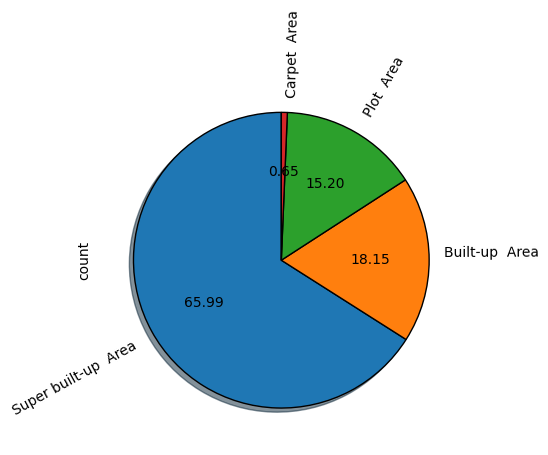

In [22]:
df['area_type'].value_counts().plot.pie(autopct='%.2f',shadow=True,startangle=90,wedgeprops={'edgecolor':'black'},rotatelabels=True)
plt.show()

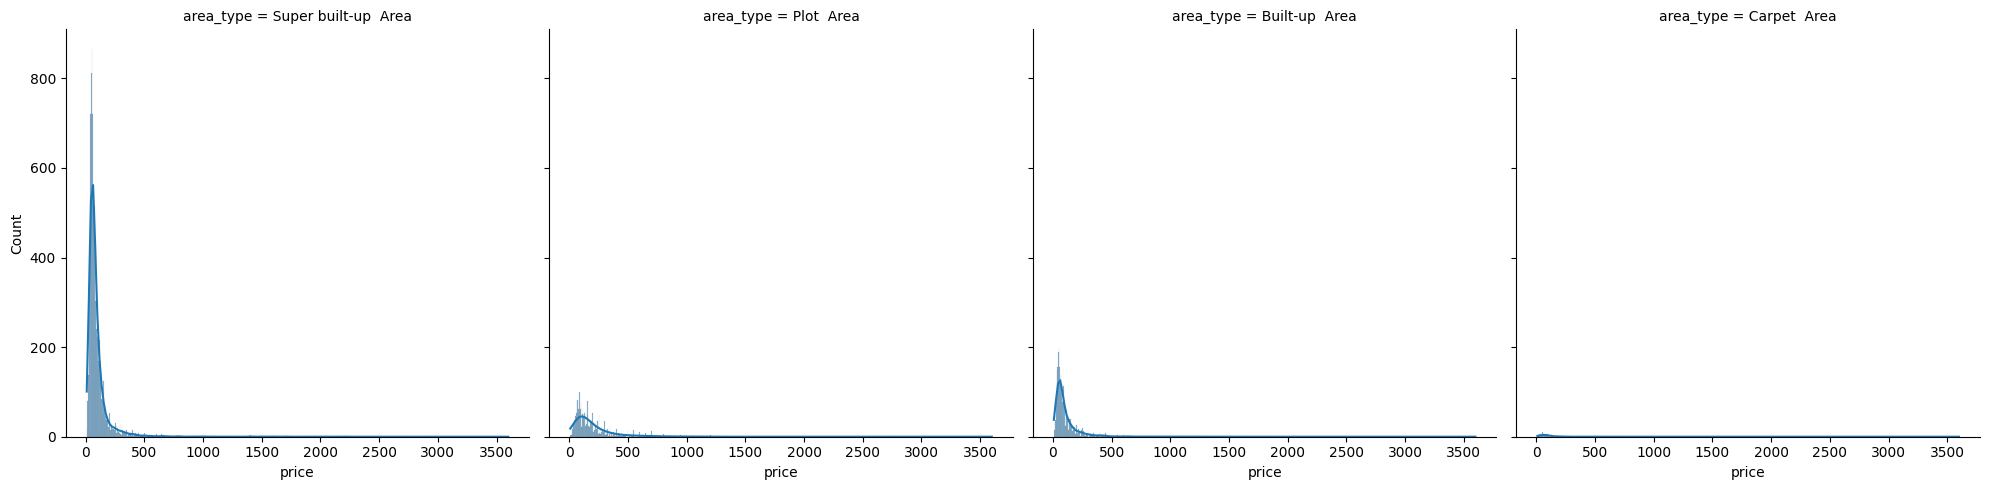

In [23]:
sns.displot(df, x="price", col="area_type", kde=True, col_wrap=4)
plt.show()

In [24]:
# area_type have 4 categories out of which one is 66% and also probablity density function of
# all four category is almost same so droping this feature
df.drop(columns=['area_type'],inplace=True)

<h3>Analysis of availability column:</h3>

In [25]:
(df['availability'].value_counts()/df.shape[0])*100

availability
Ready To Move    79.436937
18-Dec            2.304805
18-May            2.214715
18-Apr            2.034535
18-Aug            1.501502
                   ...    
15-Aug            0.007508
17-Jan            0.007508
16-Nov            0.007508
16-Jan            0.007508
14-Jul            0.007508
Name: count, Length: 81, dtype: float64

In [26]:
# availability have 81 categories but one value is around 80% so this feature is not usefull
df.drop(columns=['availability'],inplace=True)

In [27]:
df.sample(3)

,location,size,total_sqft,bath,balcony,price
10572,Electronic City,2 BHK,1258,2.0,1.0,85.5
9710,Haralur Road,2 BHK,1243,2.0,1.0,46.0
3535,Electronic City,3 BHK,1700,3.0,2.0,75.0


<h3>Analysis of location column:</h3>

In [28]:
df['location'].value_counts()

location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

In [29]:
df['location'].isna().sum()

1

In [30]:
#filling missing value with mode
df['location'] = df['location'].fillna('Whitefield')

In [31]:
df['location'].nunique()

1305

In [32]:
location_counts = df['location'].value_counts()

In [33]:
len(location_counts[location_counts<=10])

1064

In [34]:
len(location_counts[location_counts>10])

241

In [35]:
# There are 1064 locations with 10 or fewer occurrences.
# To reduce the number of unique categories, these locations will be grouped under a new category named "other".
df['location'] = df['location'].apply(lambda x:'other' if location_counts[x]<=10 else x)

In [36]:
df['location'].nunique()

242

now there are only 242 categories 

In [37]:
df.sample(3)

,location,size,total_sqft,bath,balcony,price
4885,Babusapalaya,3 BHK,1358,2.0,1.0,43.10
4563,other,2 BHK,1113,2.0,2.0,46.00
2412,Raja Rajeshwari Nagar,2 BHK,1196,2.0,2.0,51.51


<h3>Analysis of size column:</h3>

In [38]:
# now let's work on size column
df['size'].isnull().sum()

16

In [39]:
df['size'].value_counts()

size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [40]:
# filling missing value with 2 BHK
df['size'] = df['size'].fillna('2 BHK')

In [41]:
df['size'].value_counts()

size
2 BHK         5215
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

The 'size' column contains two types of categories: 'Bedroom' and 'BHK'.<br>
To ensure consistency, this needs to be standardized.<br>
making a new column BHK 

In [42]:
df['BHK'] = df['size'].str.split(' ').str[0].astype(int)

In [43]:
df['BHK'].value_counts()

BHK
2     5544
3     4857
4     1417
1      656
5      356
6      221
7      100
8       89
9       54
10      14
11       4
27       1
19       1
16       1
43       1
14       1
12       1
13       1
18       1
Name: count, dtype: int64

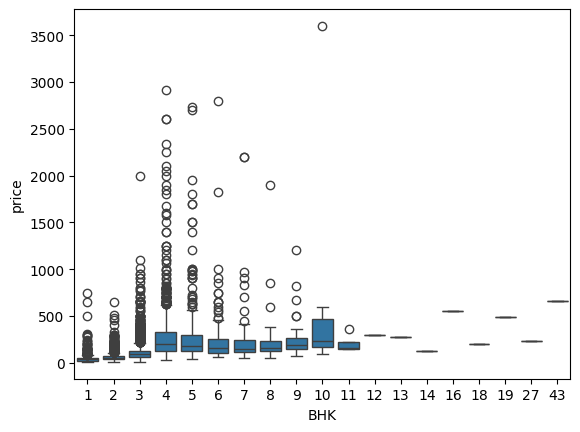

In [44]:
sns.boxplot(x=df['BHK'],y=df['price'])
plt.show()

there are many outliers that need to be fixed,will fixed later

In [45]:
# removinf size column
df.drop(columns=['size'],inplace=True)

In [46]:
df.sample(5)

,location,total_sqft,bath,balcony,price,BHK
9182,Yeshwanthpur,1165,2.0,2.0,64.08,2
11374,Kaval Byrasandra,2700,3.0,2.0,200.00,3
13266,Varthur,1665,3.0,2.0,71.58,3
7223,Pai Layout,810,2.0,2.0,34.50,2
9083,Kundalahalli,1800,3.0,2.0,110.00,3


<h3> Analysis of total_sqft column:</h3>

In [47]:
df['total_sqft'].nunique()

2117

In [48]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [49]:
# there are few values in ranges 
def convert_ranges_to_sqft(x):
    temp = x.split('-')
    if(len(temp)==2):
        return (float(temp[0])+float(temp[1]))/2
    try:
        return float(x)
    except:
        return None

In [50]:
df['total_sqft'] = df['total_sqft'].apply(convert_ranges_to_sqft)

In [51]:
df.sample(3)

,location,total_sqft,bath,balcony,price,BHK
5258,Kanakpura Road,1300.0,2.0,1.0,89.76,2
5330,Electronic City,1156.0,2.0,2.0,42.00,2
333,6th Phase JP Nagar,1192.0,2.0,2.0,74.00,2


<h4>creating a new columns price per sqft because it's a very important feature in real state:</h4>

In [52]:
df['price_per_sqft'] = df['price']*100000/df['total_sqft']

In [53]:
df['price_per_sqft']

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: price_per_sqft, Length: 13320, dtype: float64

In [54]:
df.describe()

,total_sqft,bath,balcony,price,BHK,price_per_sqft
count,13274.000000,13247.000000,12711.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.692610,1.584376,112.565627,2.802778,7.907501e+03
std,1238.405258,1.341458,0.817263,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,0.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,1.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,2.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3.000000,3600.000000,43.000000,1.200000e+07


In [55]:
df.sample(3)

,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
245,Electronic City,1200.0,3.0,1.0,90.0,3,7500.000000
3484,Kodihalli,2408.0,4.0,2.0,260.0,3,10797.342193
11096,other,4395.0,3.0,3.0,240.0,3,5460.750853


<h2>Analysis of bath column:</h2>

In [56]:
df['bath'].nunique()

19

In [57]:
df['bath'].value_counts()

bath
2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: count, dtype: int64

In [58]:
df['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9., nan,  8.,  7., 11., 10., 14.,
       27., 12., 16., 40., 15., 13., 18.])

In [59]:
df['bath'].isnull().sum()

73

In [60]:
#filling missing value with median
df['bath'] = df['bath'].fillna(df['bath'].median())

<Axes: xlabel='bath', ylabel='count'>

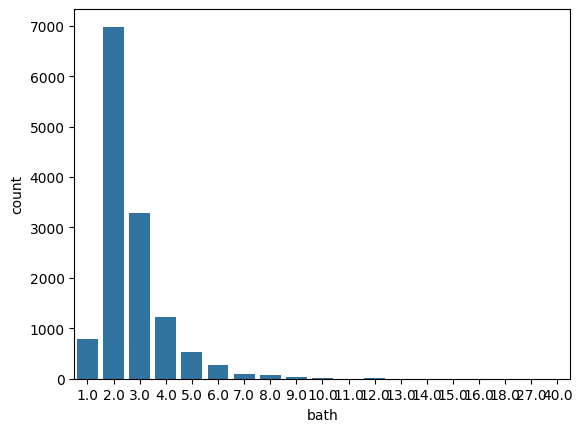

In [61]:
sns.countplot(x=df['bath'])

This column contains outliers, which will be handled later.

In [62]:
df.sample(3)

,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
116,Kengeri,1540.0,2.0,3.0,64.0,3,4155.844156
12487,Sanjay nagar,1150.0,2.0,0.0,70.0,2,6086.956522
11129,Whitefield,4500.0,4.0,NaN,330.0,4,7333.333333


<h2>Analysis of balcony column:</h2>

In [63]:
df['balcony'].nunique()

4

In [64]:
df['balcony'].value_counts()

balcony
2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: count, dtype: int64

In [65]:
df['balcony'].isnull().sum()

609

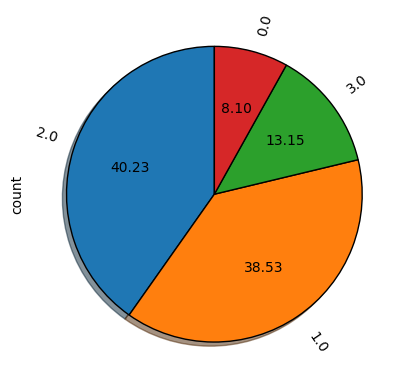

In [66]:
df['balcony'].value_counts().plot.pie(autopct='%.2f',shadow=True,startangle=90,wedgeprops={'edgecolor':'black'},rotatelabels=True)
plt.show()

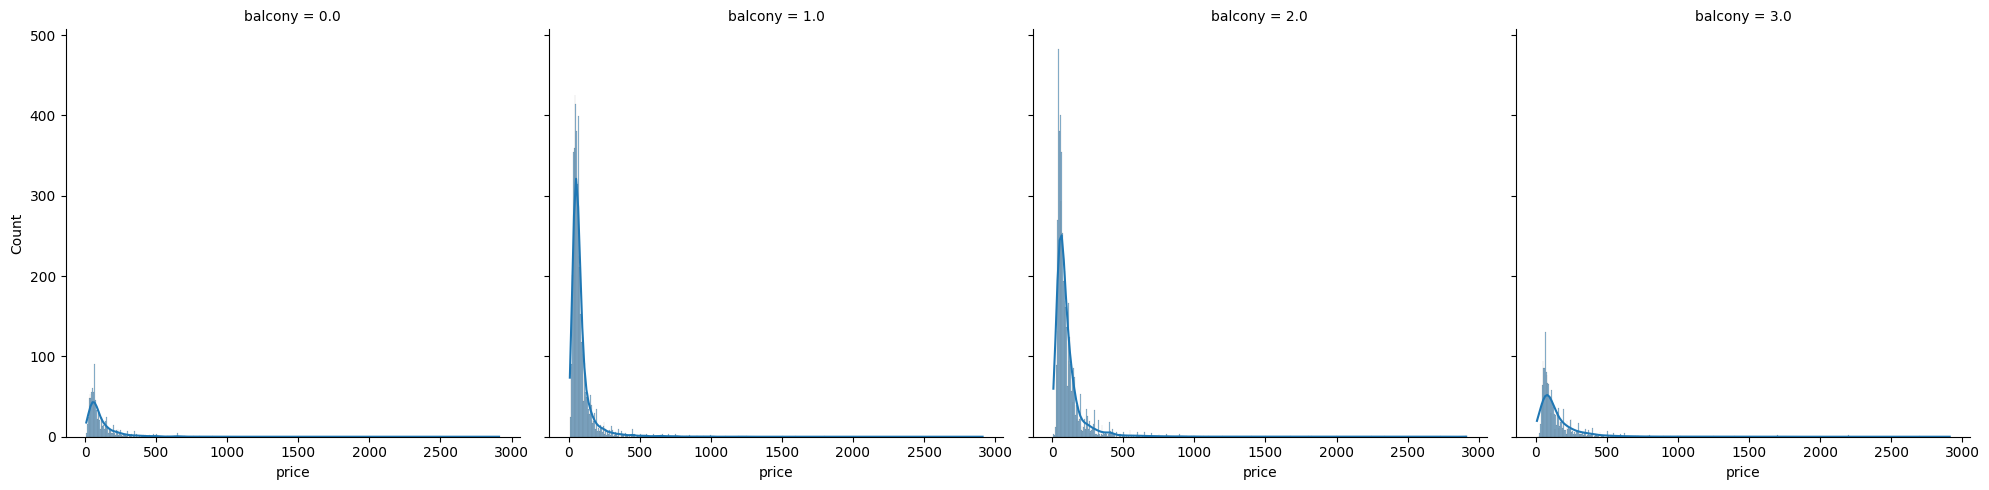

In [67]:
sns.displot(df, x="price", col="balcony", kde=True, col_wrap=4)
plt.show()

since there are only four categories and pdf is almost similar in all so this feature doesn't impact price that much so it will get dropped

In [68]:
df.drop(columns=['balcony'],inplace=True)

In [69]:
df.sample(3)

,location,total_sqft,bath,price,BHK,price_per_sqft
5619,Marathahalli,1102.0,2.0,53.67,2,4870.235935
2166,Whitefield,825.0,1.0,45.00,1,5454.545455
9775,Kaggadasapura,1495.0,3.0,60.00,3,4013.377926


<h4># The analysis of all columns is complete. Next, the focus will be on detecting and removing outliers.
</h4>

<h1>Outlier's detection and removal</h1>

In [70]:
df.sample(3)

,location,total_sqft,bath,price,BHK,price_per_sqft
1339,JP Nagar,940.0,2.0,49.0,2,5212.765957
6928,Whitefield,1250.0,2.0,82.0,2,6560.000000
3929,other,1100.0,2.0,38.0,2,3454.545455


In [71]:
df.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


<h3>outlier's of total_sqft column :</h3>

let's see area per BHK:

In [72]:
(df['total_sqft']/df['BHK']).describe()

count    13274.000000
mean       575.074878
std        388.205175
min          0.250000
25%        473.333333
50%        552.500000
75%        625.000000
max      26136.000000
dtype: float64

In [73]:
# in 1BHK area should be >= 300 so removing rows in area per BHK is less than 300
df = df[(df['total_sqft']/df['BHK']) >= 300]

In [74]:
df.shape

(12530, 6)

In [75]:
df.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,12530.000000,12530.000000,12530.000000,12530.000000,12530.000000
mean,1594.564544,2.559537,111.382401,2.650838,6303.979357
std,1261.271296,1.077938,152.077329,0.976678,4162.237981
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1116.000000,2.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


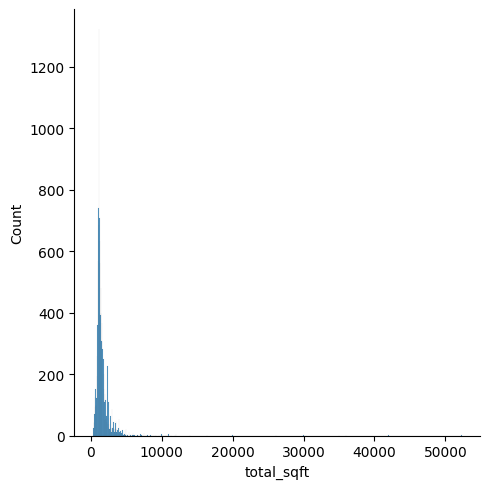

In [76]:
sns.displot(x=df['total_sqft'])

In [77]:
df.sample(3)

,location,total_sqft,bath,price,BHK,price_per_sqft
1734,Sarjapur,1240.0,2.0,44.0,2,3548.387097
6529,BTM Layout,1020.0,2.0,46.5,2,4558.823529
9717,Kadubeesanahalli,1184.0,2.0,55.0,2,4645.270270


<h3>Outlier's of price_per_sqft:</h3>

In [78]:
df['price_per_sqft'].describe()

count     12530.000000
mean       6303.979357
std        4162.237981
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [79]:
#seeing price_per_sqft location wise
df.groupby('location')['price_per_sqft'].describe()

,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
Devarachikkanahalli,14.0,4969.906245,2594.870914,3185.840708,3649.081736,4305.148257,4676.936243,13333.333333
1st Block Jayanagar,10.0,12359.253758,3931.939592,6000.000000,11100.460123,12258.569501,15018.022329,18750.000000
1st Phase JP Nagar,23.0,9726.405918,4802.127570,5274.725275,7170.133907,8425.613866,9901.259524,25000.000000
2nd Phase Judicial Layout,11.0,4048.701183,674.730658,3500.000000,3500.000000,3500.000000,4739.316239,5000.000000
2nd Stage Nagarbhavi,9.0,14381.275720,5272.435848,5666.666667,14666.666667,15033.333333,18750.000000,20416.666667
...,...,...,...,...,...,...,...,...
Yelahanka,208.0,5177.606819,1761.479589,371.428571,4290.940767,5012.513762,5859.524889,19875.776398
Yelahanka New Town,38.0,5860.659870,3889.233175,1875.000000,3776.785714,5040.025016,5413.853463,22475.000000
Yelenahalli,13.0,4012.550871,533.259531,3125.000000,3800.000000,3835.625000,4121.212121,5176.876618


For each location group, price_per_sqft will be kept within the range [mean - standard deviation, mean + standard deviation].

In [80]:
#function to kept price_per_sqft in range
def remove_price_per_sqft_outliers(df):
    temp_df = pd.DataFrame()
    for location,sub_df in df.groupby('location'):
        mean = sub_df['price_per_sqft'].mean()
        std_dev = sub_df['price_per_sqft'].std()
        
        filtered_df = sub_df[(sub_df['price_per_sqft'] >= mean-std_dev) & (sub_df['price_per_sqft'] <= mean+std_dev)]
        temp_df = pd.concat([temp_df,filtered_df],ignore_index=True)
    return temp_df
df = remove_price_per_sqft_outliers(df)

In [81]:
df['price_per_sqft'].describe()

count    10353.000000
mean      5660.848288
std       2270.910791
min       1250.000000
25%       4239.631336
50%       5175.600739
75%       6432.748538
max      24509.803922
Name: price_per_sqft, dtype: float64

In [82]:
df.sample(2)

,location,total_sqft,bath,price,BHK,price_per_sqft
7517,Whitefield,1280.0,2.0,69.0,2,5390.625000
2234,Electronic City Phase II,1160.0,2.0,33.5,2,2887.931034


<h3>Outlier's of BHK column:</h3>

<Axes: xlabel='BHK', ylabel='count'>

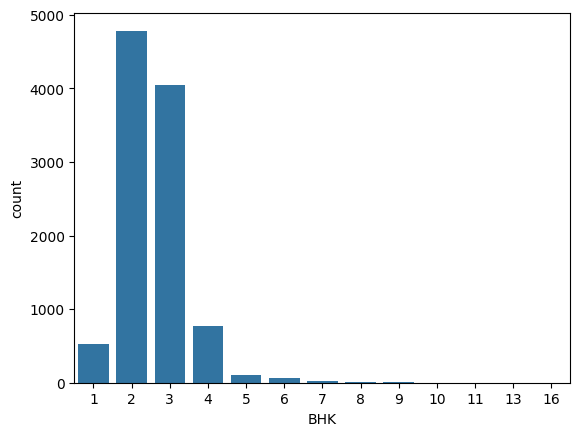

In [83]:
sns.countplot(x=df['BHK'])

<Axes: xlabel='BHK'>

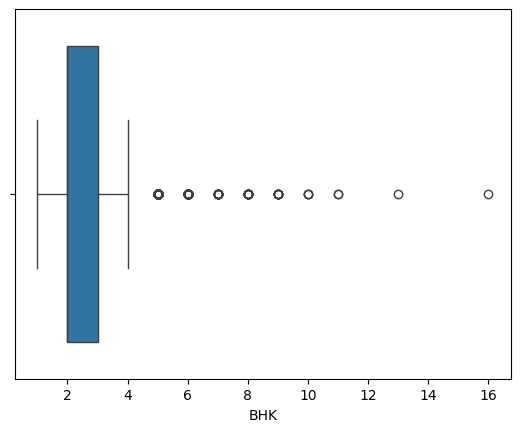

In [84]:
sns.boxplot(x=df['BHK'])

Houses with more than 7 BHK are uncommon, so they will be removed from the dataset.

In [85]:
df = df[df['BHK'] <= 7].copy()

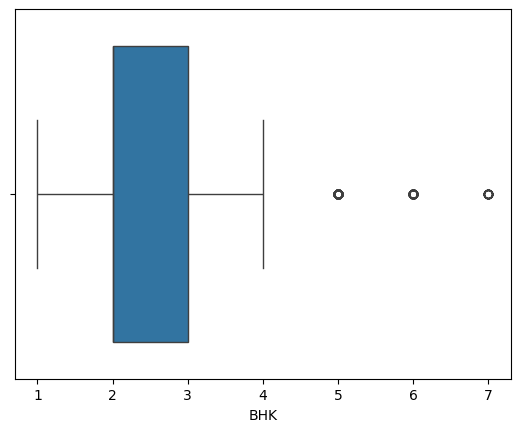

In [86]:
sns.boxplot(x=df['BHK'])
plt.show()

In [87]:
df.sample(2)

,location,total_sqft,bath,price,BHK,price_per_sqft
1199,Benson Town,1300.0,2.0,120.0,2,9230.769231
4603,Koramangala,1325.0,2.0,119.0,2,8981.132075


<h3>Outlier's of bath column:</h3>

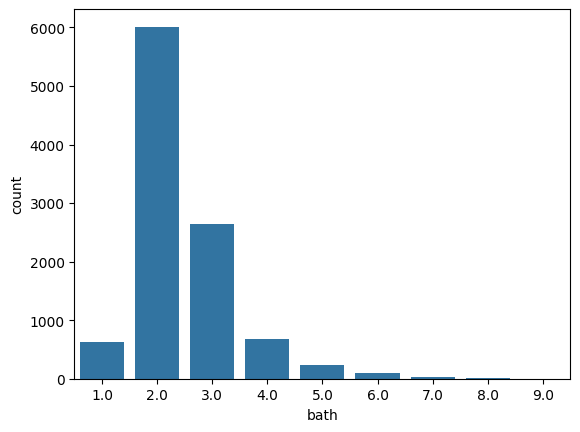

In [88]:
sns.countplot(x=df['bath'])
plt.show()

In [89]:
# Houses with more than 6 bathrooms are uncommon, so they will be removed from the dataset.
df = df[df['bath'] <= 6].copy()

In [90]:
# Ensuring that the number of bathrooms does not exceed BHK + 2
df = df[df['bath'] <= df['BHK'] + 2].copy()

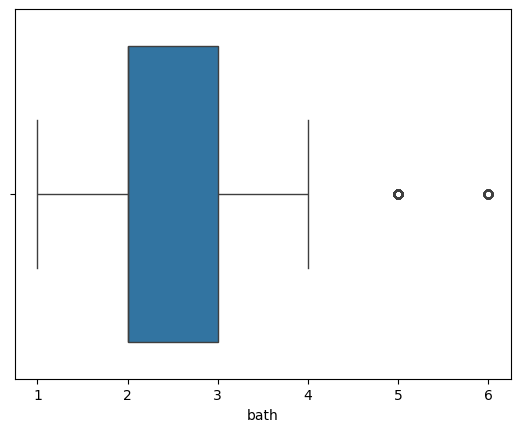

In [91]:
sns.boxplot(x=df['bath'])
plt.show()

In [92]:
df.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,10287.000000,10287.000000,10287.000000,10287.000000,10287.000000
mean,1491.338360,2.437737,90.257877,2.543696,5658.463876
std,837.874008,0.871027,82.457900,0.793476,2258.106894
min,300.000000,1.000000,10.000000,1.000000,1250.000000
25%,1107.000000,2.000000,48.950000,2.000000,4242.179863
50%,1280.000000,2.000000,67.000000,2.000000,5176.565008
75%,1645.000000,3.000000,100.000000,3.000000,6428.780162
max,30400.000000,6.000000,2100.000000,7.000000,24509.803922


In [93]:
df.sample(2)

,location,total_sqft,bath,price,BHK,price_per_sqft
121,7th Phase JP Nagar,1343.0,2.0,56.41,3,4200.297841
164,7th Phase JP Nagar,1680.0,3.0,125.00,3,7440.476190


In [94]:
# Dropping the price_per_sqft column as it will no longer be used in further analysis.
df.drop(columns=['price_per_sqft'], inplace=True)

In [95]:
df.sample(3)

,location,total_sqft,bath,price,BHK
7453,Whitefield,1085.0,2.0,57.0,2
1512,Chamrajpet,1475.0,2.0,120.0,3
2197,Electronic City Phase II,1000.0,2.0,25.0,2


<h3>Now the dataset is cleaned</h3>

<h1>Model Building:</h1>

In [96]:
#importing libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score

In [97]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['price']),df['price'],test_size=.2,random_state=2)

In [98]:
X_train.sample(3)

,location,total_sqft,bath,BHK
4331,Kasavanhalli,1380.0,2.0,3
10013,other,1100.0,2.0,2
7224,Vittasandra,1404.0,2.0,2


In [99]:
# transformer for OneHotEncoding
one_hot_transformer = ColumnTransformer([
    ('one_hot_encoder',OneHotEncoder(drop='first',sparse_output=False,dtype=int,handle_unknown='ignore'),['location'])
],remainder='passthrough')

In [100]:
#scaling
scaler = StandardScaler()

<h3>Applying Linear Regression:</h3>

In [101]:
lr = LinearRegression()

In [102]:
pipe_lr = make_pipeline(one_hot_transformer,scaler,lr)

In [103]:
pipe_lr.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(drop='first',
                                                                dtype=<class 'int'>,
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [104]:
y_pred_lr = pipe_lr.predict(X_test)

In [105]:
r2_score(y_test,y_pred_lr)

0.8017182860311151

<h3>Applying Lasso:</h3>

In [106]:
lasso = Lasso()

In [107]:
pipe_lasso = make_pipeline(one_hot_transformer,scaler,lasso)

In [108]:
pipe_lasso.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(drop='first',
                                                                dtype=<class 'int'>,
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [109]:
y_pred_lasso = pipe_lasso.predict(X_test)
r2_score(y_test,y_pred_lasso)

0.7978587601178185

<h3>Applying Ridge:</h3>

In [110]:
ridge = Ridge()

In [111]:
pipe_ridge = make_pipeline(one_hot_transformer,scaler,ridge)

In [112]:
pipe_ridge.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(drop='first',
                                                                dtype=<class 'int'>,
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [113]:
y_pred_ridge = pipe_ridge.predict(X_test)
r2_score(y_test,y_pred_ridge)

0.8017480078522325

In [114]:
print("LinearRegression r2_score: ",r2_score(y_test,y_pred_lr))
print("LassoRegression r2_score: ",r2_score(y_test,y_pred_lasso))
print("RidgeRegression r2_score: ",r2_score(y_test,y_pred_ridge))

LinearRegression r2_score:  0.8017182860311151
LassoRegression r2_score:  0.7978587601178185
RidgeRegression r2_score:  0.8017480078522325


### importing model to create web application:

In [116]:
import pickle
pickle.dump(pipe_lr, open('model.pkl','wb'))